# NHANES Data Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
%matplotlib inline

## Reading data
All data can be found in `data/raw/NHANES`, separated by years.

In [2]:
prefix = '../data/raw/NHANES/'

### 2005 - 2006

In [3]:
demo4 = pd.read_sas(prefix+'2005-2006/DEMO_D.XPT')
auq4 = pd.read_sas(prefix+'2005-2006/AUQ_D.XPT')
aux4 = pd.read_sas(prefix+'2005-2006/AUX_D.XPT')
auxar4 = pd.read_sas(prefix+'2005-2006/AUXAR_D.XPT')
auxtym4 = pd.read_sas(prefix+'2005-2006/AUXTYM_D.XPT')

df4 = (demo4.join(auq4.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(aux4.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxar4.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxtym4.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
)

df4_filtered = df4.filter(
    [
     'SEQN',
     'AUDTYR84',
     'AUDTYL84',
     'AUAEXCMT',
     'AUAEXSTS',
     'AUQ030',
     'AUQ040',
     'AUXOTSPL',
     'AUXROTSP',
     'AUXR1K1L',
     'AUXR1K1R',
     'AUXR2KL',
     'AUXR2KR',
     'AUXR4KL',
     'AUXR4KR',
     'AUXR5CL',
     'AUXR5CR',
     'AUXU1K1L',
     'AUXU1K1R',
     'AUXU2KL',
     'AUXU2KR',
     'AUXU4KL',
     'AUXU4KR',
     'AUXU500L',
     'AUXU500R',
     'AUQ191',
     'AUQ231'
   ]
  )

df4_filtered.rename(columns = {
    'AUDTYR84': 'Tympanometry-Right Ear, Measurement 84',
    'AUDTYL84': 'Tympanometry- Left Ear, Measurement 84',
    'AUAEXCMT': 'Comment code for an Audio Exam',
    'AUAEXSTS': 'Status of an Audiometry Exam',
    'AUQ030': 'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
    'AUQ040': 'How many hours ago did the noise or music end?',
    'AUXOTSPL': 'Normal: Left Ear Otoscopy',
    'AUXROTSP': 'Normal: Right Ear Otoscopy',
    'AUXR1K1L': 'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR1K1R': 'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR2KL': 'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR2KR': 'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR4KL': 'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR4KR': 'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR5CL': 'Left retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXR5CR': 'Right retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU1K1L': 'Left threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU1K1R': 'Right threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU2KL': 'Left threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU2KR': 'Right threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU4KL': 'Left threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU4KR': 'Right threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU500L': 'Left threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU500R': 'Right threshold @ 500Hz in decibels (Hearing Level)',
    'AUQ191': 'Ears ringing, roaring, buzzing past year',
    'AUQ231': 'Loud noise exposure for 5 hours?'
    },
    inplace = True
)

df4_filtered['years'] = '2005-2006'

In [4]:
df4_filtered.head()

,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),...,Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years
2,31129.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,15.0,5.0,5.0,1.000000e+01,5.000000e+00,5.397605e-79,1.000000e+01,2.0,2.0,2005-2006
3,31130.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2005-2006
5,31132.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,15.0,30.0,20.0,6.500000e+01,1.000000e+02,2.000000e+01,2.000000e+01,1.0,2.0,2005-2006
6,31133.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,-5.0,-5.0,-5.0,5.397605e-79,5.397605e-79,1.000000e+01,5.397605e-79,2.0,1.0,2005-2006
7,31134.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,2.0,NaN,...,5.0,15.0,15.0,9.500000e+01,1.000000e+02,5.000000e+00,5.000000e+00,2.0,1.0,2005-2006


### 2007 - 2008


In [5]:
demo5 = pd.read_sas(prefix+'2007-2008/DEMO_E.XPT')
auq5 = pd.read_sas(prefix+'2007-2008/AUQ_E.XPT')
aux5 = pd.read_sas(prefix+'2007-2008/AUX_E.XPT')
auxar5 = pd.read_sas(prefix+'2007-2008/AUXAR_E.XPT')
auxtym5 = pd.read_sas(prefix+'2007-2008/AUXTYM_E.XPT')

df5 = (demo5.join(auq5.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(aux5.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxar5.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxtym5.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
)

df5_filtered = df5.filter(
    [
     'SEQN',
     'AUDTYR84',
     'AUDTYL84',
     'AUAEXCMT',
     'AUAEXSTS',
     'AUQ030',
     'AUQ040',
     'AUXOTSPL',
     'AUXROTSP',
     'AUXR1K1L',
     'AUXR1K1R',
     'AUXR2KL',
     'AUXR2KR',
     'AUXR4KL',
     'AUXR4KR',
     'AUXR5CL',
     'AUXR5CR',
     'AUXU1K1L',
     'AUXU1K1R',
     'AUXU2KL',
     'AUXU2KR',
     'AUXU4KL',
     'AUXU4KR',
     'AUXU500L',
     'AUXU500R',
     'AUQ191',
     'AUQ231'
   ]
  )

df5_filtered.rename(columns = {
    'AUDTYR84': 'Tympanometry-Right Ear, Measurement 84',
    'AUDTYL84': 'Tympanometry- Left Ear, Measurement 84',
    'AUAEXCMT': 'Comment code for an Audio Exam',
    'AUAEXSTS': 'Status of an Audiometry Exam',
    'AUQ030': 'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
    'AUQ040': 'How many hours ago did the noise or music end?',
    'AUXOTSPL': 'Normal: Left Ear Otoscopy',
    'AUXROTSP': 'Normal: Right Ear Otoscopy',
    'AUXR1K1L': 'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR1K1R': 'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR2KL': 'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR2KR': 'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR4KL': 'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR4KR': 'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR5CL': 'Left retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXR5CR': 'Right retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU1K1L': 'Left threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU1K1R': 'Right threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU2KL': 'Left threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU2KR': 'Right threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU4KL': 'Left threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU4KR': 'Right threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU500L': 'Left threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU500R': 'Right threshold @ 500Hz in decibels (Hearing Level)',
    'AUQ191': 'Ears ringing, roaring, buzzing past year',
    'AUQ231': 'Loud noise exposure for 5 hours?'
    },
    inplace = True
)

df5_filtered['years'] = '2007-2008'

In [6]:
df5_filtered.head()

,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),...,Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years
24,41499.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,21.0,1.0,1.0,NaN,...,5.397605e-79,5.397605e-79,5.397605e-79,5.0,5.397605e-79,15.0,10.0,2.0,2.0,2007-2008
25,41500.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,1.000000e+01,1.000000e+01,1.000000e+01,30.0,1.000000e+01,10.0,5.0,2.0,2.0,2007-2008
28,41503.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,5.000000e+00,1.500000e+01,1.500000e+01,35.0,4.000000e+01,15.0,10.0,2.0,1.0,2007-2008
55,41530.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,5.397605e-79,-5.000000e+00,5.000000e+00,15.0,5.397605e-79,15.0,10.0,2.0,2.0,2007-2008
62,41537.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,8.0,1.0,1.0,NaN,...,5.000000e+00,5.000000e+00,5.000000e+00,-10.0,5.000000e+00,20.0,5.0,2.0,2.0,2007-2008


### 2009 - 2010

In [7]:
demo6 = pd.read_sas(prefix+'2009-2010/DEMO_F.XPT')
auq6 = pd.read_sas(prefix+'2009-2010/AUQ_F.XPT')
aux6 = pd.read_sas(prefix+'2009-2010/AUX_F.XPT')
auxar6 = pd.read_sas(prefix+'2009-2010/AUXAR_F.XPT')
auxtym6 = pd.read_sas(prefix+'2009-2010/AUXTYM_F.XPT')

df6 = (demo6.join(auq6.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(aux6.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxar6.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxtym6.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
)

df6_filtered = df6.filter(
    [
     'SEQN',
     'AUDTYR84',
     'AUDTYL84',
     'AUAEXCMT',
     'AUAEXSTS',
     'AUQ030',
     'AUQ040',
     'AUXOTSPL',
     'AUXROTSP',
     'AUXR1K1L',
     'AUXR1K1R',
     'AUXR2KL',
     'AUXR2KR',
     'AUXR4KL',
     'AUXR4KR',
     'AUXR5CL',
     'AUXR5CR',
     'AUXU1K1L',
     'AUXU1K1R',
     'AUXU2KL',
     'AUXU2KR',
     'AUXU4KL',
     'AUXU4KR',
     'AUXU500L',
     'AUXU500R',
     'AUQ191',
     'AUQ231'
   ]
  )

df6_filtered.rename(columns = {
    'AUDTYR84': 'Tympanometry-Right Ear, Measurement 84',
    'AUDTYL84': 'Tympanometry- Left Ear, Measurement 84',
    'AUAEXCMT': 'Comment code for an Audio Exam',
    'AUAEXSTS': 'Status of an Audiometry Exam',
    'AUQ030': 'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
    'AUQ040': 'How many hours ago did the noise or music end?',
    'AUXOTSPL': 'Normal: Left Ear Otoscopy',
    'AUXROTSP': 'Normal: Right Ear Otoscopy',
    'AUXR1K1L': 'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR1K1R': 'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR2KL': 'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR2KR': 'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR4KL': 'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR4KR': 'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR5CL': 'Left retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXR5CR': 'Right retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU1K1L': 'Left threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU1K1R': 'Right threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU2KL': 'Left threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU2KR': 'Right threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU4KL': 'Left threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU4KR': 'Right threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU500L': 'Left threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU500R': 'Right threshold @ 500Hz in decibels (Hearing Level)',
    'AUQ191': 'Ears ringing, roaring, buzzing past year',
    'AUQ231': 'Loud noise exposure for 5 hours?'
    },
    inplace = True
)

df6_filtered['years'] = '2009-2010'

In [8]:
df6_filtered.head()

,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),...,Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years
2,51626.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,5.397605e-79,5.000000e+00,5.000000e+00,5.397605e-79,-5.0,15.0,20.0,2.0,2.0,2009-2010
9,51633.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,3.500000e+01,6.500000e+01,6.000000e+01,7.500000e+01,70.0,40.0,40.0,2.0,1.0,2009-2010
11,51635.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,1.500000e+01,2.500000e+01,2.500000e+01,8.000000e+01,60.0,10.0,10.0,2.0,2.0,2009-2010
16,51640.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,4.0,1.0,1.0,NaN,...,5.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,-5.0,15.0,10.0,2.0,1.0,2009-2010
17,51641.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,1.000000e+01,1.000000e+01,-5.000000e+00,5.397605e-79,-10.0,5.0,5.0,2.0,2.0,2009-2010


### 2011 - 2012

In [9]:
demo7 = pd.read_sas(prefix+'2011-2012/DEMO_G.XPT')
auq7 = pd.read_sas(prefix+'2011-2012/AUQ_G.XPT')
aux7 = pd.read_sas(prefix+'2011-2012/AUX_G.XPT')
auxar7 = pd.read_sas(prefix+'2011-2012/AUXAR_G.XPT')
auxtym7 = pd.read_sas(prefix+'2011-2012/AUXTYM_G.XPT')

df7 = (demo7.join(auq7.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(aux7.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxar7.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxtym7.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
)

df7_filtered = df7.filter(
    [
     'SEQN',
     'AUDTYR84',
     'AUDTYL84',
     'AUAEXCMT',
     'AUAEXSTS',
     'AUQ030',
     'AUQ040',
     'AUXOTSPL',
     'AUXROTSP',
     'AUXR1K1L',
     'AUXR1K1R',
     'AUXR2KL',
     'AUXR2KR',
     'AUXR4KL',
     'AUXR4KR',
     'AUXR5CL',
     'AUXR5CR',
     'AUXU1K1L',
     'AUXU1K1R',
     'AUXU2KL',
     'AUXU2KR',
     'AUXU4KL',
     'AUXU4KR',
     'AUXU500L',
     'AUXU500R',
     'AUQ191',
     'AUQ360',
     'AUQ370'
   ]
  )

df7_filtered.rename(columns = {
    'AUDTYR84': 'Tympanometry-Right Ear, Measurement 84',
    'AUDTYL84': 'Tympanometry- Left Ear, Measurement 84',
    'AUAEXCMT': 'Comment code for an Audio Exam',
    'AUAEXSTS': 'Status of an Audiometry Exam',
    'AUQ030': 'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
    'AUQ040': 'How many hours ago did the noise or music end?',
    'AUXOTSPL': 'Normal: Left Ear Otoscopy',
    'AUXROTSP': 'Normal: Right Ear Otoscopy',
    'AUXR1K1L': 'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR1K1R': 'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR2KL': 'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR2KR': 'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR4KL': 'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR4KR': 'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR5CL': 'Left retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXR5CR': 'Right retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU1K1L': 'Left threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU1K1R': 'Right threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU2KL': 'Left threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU2KR': 'Right threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU4KL': 'Left threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU4KR': 'Right threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU500L': 'Left threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU500R': 'Right threshold @ 500Hz in decibels (Hearing Level)',
    'AUQ191': 'Ears ringing, roaring, buzzing past year',
    'AUQ360': 'How long exposed to very loud noise',
    'AUQ370': 'Had off-work exposure to loud noise?'
    },
    inplace = True
)

df7_filtered['years'] = '2011-2012'

In [10]:
df7_filtered.head()

,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),...,Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",How long exposed to very loud noise,Had off-work exposure to loud noise?,years
0,62161.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,30.0,30.0,10.0,30.0,3.000000e+01,3.000000e+01,2.0,NaN,2.0,2011-2012
3,62164.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,30.0,30.0,20.0,25.0,2.000000e+01,2.500000e+01,1.0,NaN,2.0,2011-2012
8,62169.0,5.397605e-79,5.397605e-79,6.0,2.0,1.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2011-2012
11,62172.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,20.0,25.0,15.0,10.0,1.000000e+01,1.000000e+01,2.0,NaN,2.0,2011-2012
15,62176.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,10.0,5.0,5.0,10.0,5.397605e-79,5.397605e-79,2.0,NaN,2.0,2011-2012


### 2015 - 2016

In [11]:
demo8 = pd.read_sas(prefix+'2015-2016/DEMO_I.XPT')
auq8 = pd.read_sas(prefix+'2015-2016/AUQ_I.XPT')
aux8 = pd.read_sas(prefix+'2015-2016/AUX_I.XPT')
auxar8 = pd.read_sas(prefix+'2015-2016/AUXAR_I.XPT')
auxtym8 = pd.read_sas(prefix+'2015-2016/AUXTYM_I.XPT')

df8 = (demo8.join(auq8.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(aux8.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxar8.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
            .join(auxtym8.set_index('SEQN'), 
                 on = 'SEQN', 
                 how = 'inner')
)

df8_filtered = df8.filter(
    [
     'SEQN',
     'AUATYMTL',
     'AUATYMTR',
     'AUAEXCMT',
     'AUAEXSTS',
     'AUQ030',
     'AUQ040',
     'AUXOTSPL',
     'AUXROTSP',
     'AUXR1K1L',
     'AUXR1K1R',
     'AUXR2KL',
     'AUXR2KR',
     'AUXR4KL',
     'AUXR4KR',
     'AUXR5CL',
     'AUXR5CR',
     'AUXU1K1L',
     'AUXU1K1R',
     'AUXU2KL',
     'AUXU2KR',
     'AUXU4KL',
     'AUXU4KR',
     'AUXU500L',
     'AUXU500R',
     'AUQ191',
     'AUQ361',
     'AUQ370'
   ]
  )

df8_filtered.rename(columns = {
    'AUATYMTL': 'Tympanogram Type, Left Ear',
    'AUATYMTR': 'Tympanogram Type, Right Ear',
    'AUAEXCMT': 'Comment code for an Audio Exam',
    'AUAEXSTS': 'Status of an Audiometry Exam',
    'AUQ030': 'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
    'AUQ040': 'How many hours ago did the noise or music end?',
    'AUXOTSPL': 'Normal: Left Ear Otoscopy',
    'AUXROTSP': 'Normal: Right Ear Otoscopy',
    'AUXR1K1L': 'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR1K1R': 'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXR2KL': 'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR2KR': 'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXR4KL': 'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR4KR': 'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXR5CL': 'Left retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXR5CR': 'Right retest threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU1K1L': 'Left threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU1K1R': 'Right threshold @ 1000Hz in decibels (Hearing Level)',
    'AUXU2KL': 'Left threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU2KR': 'Right threshold @ 2000Hz in decibels (Hearing Level)',
    'AUXU4KL': 'Left threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU4KR': 'Right threshold @ 4000Hz in decibels (Hearing Level)',
    'AUXU500L': 'Left threshold @ 500Hz in decibels (Hearing Level)',
    'AUXU500R': 'Right threshold @ 500Hz in decibels (Hearing Level)',
    'AUQ191': 'Ears ringing, roaring, buzzing past year',
    'AUQ360': 'How long exposed to very loud noise',
    'AUQ361': 'Please give me the total number of moths or years for all jobs where this has happened',
    'AUQ370': 'Had off-work exposure to loud noise?'
    },
    inplace = True
)

df8_filtered['years'] = '2015-2016'

In [12]:
df8_filtered.head()

,SEQN,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),...,Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Please give me the total number of moths or years for all jobs where this has happened,Had off-work exposure to loud noise?,years
0,83732.0,b'Type A',b'Type A',NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,5.0,5.0,50.0,30.0,5.0,10.0,2.0,NaN,2.0,2015-2016
0,83732.0,b'Type A',b'Type A',NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,5.0,5.0,50.0,30.0,5.0,10.0,2.0,NaN,2.0,2015-2016
0,83732.0,b'Type A',b'Type A',NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,5.0,5.0,50.0,30.0,5.0,10.0,2.0,NaN,2.0,2015-2016
0,83732.0,b'Type A',b'Type A',NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,5.0,5.0,50.0,30.0,5.0,10.0,2.0,NaN,2.0,2015-2016
0,83732.0,b'Type A',b'Type A',NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,5.0,5.0,50.0,30.0,5.0,10.0,2.0,NaN,2.0,2015-2016


### Appending all dataframes into a single one

In [13]:
df_filtered = (
    df4_filtered.append(df5_filtered)
       .append(df6_filtered)
       .append(df7_filtered)
       .append(df8_filtered)
)

df_filtered = df_filtered.drop_duplicates()
df_filtered = df_filtered.reset_index()

In [14]:
df_filtered.head()

,index,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,...,Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",Please give me the total number of moths or years for all jobs where this has happened
0,2,31129.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,...,5.397605e-79,1.000000e+01,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN
1,3,31130.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN
2,5,31132.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,...,2.000000e+01,2.000000e+01,1.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN
3,6,31133.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,...,1.000000e+01,5.397605e-79,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN
4,7,31134.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,2.0,...,5.000000e+00,5.000000e+00,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN


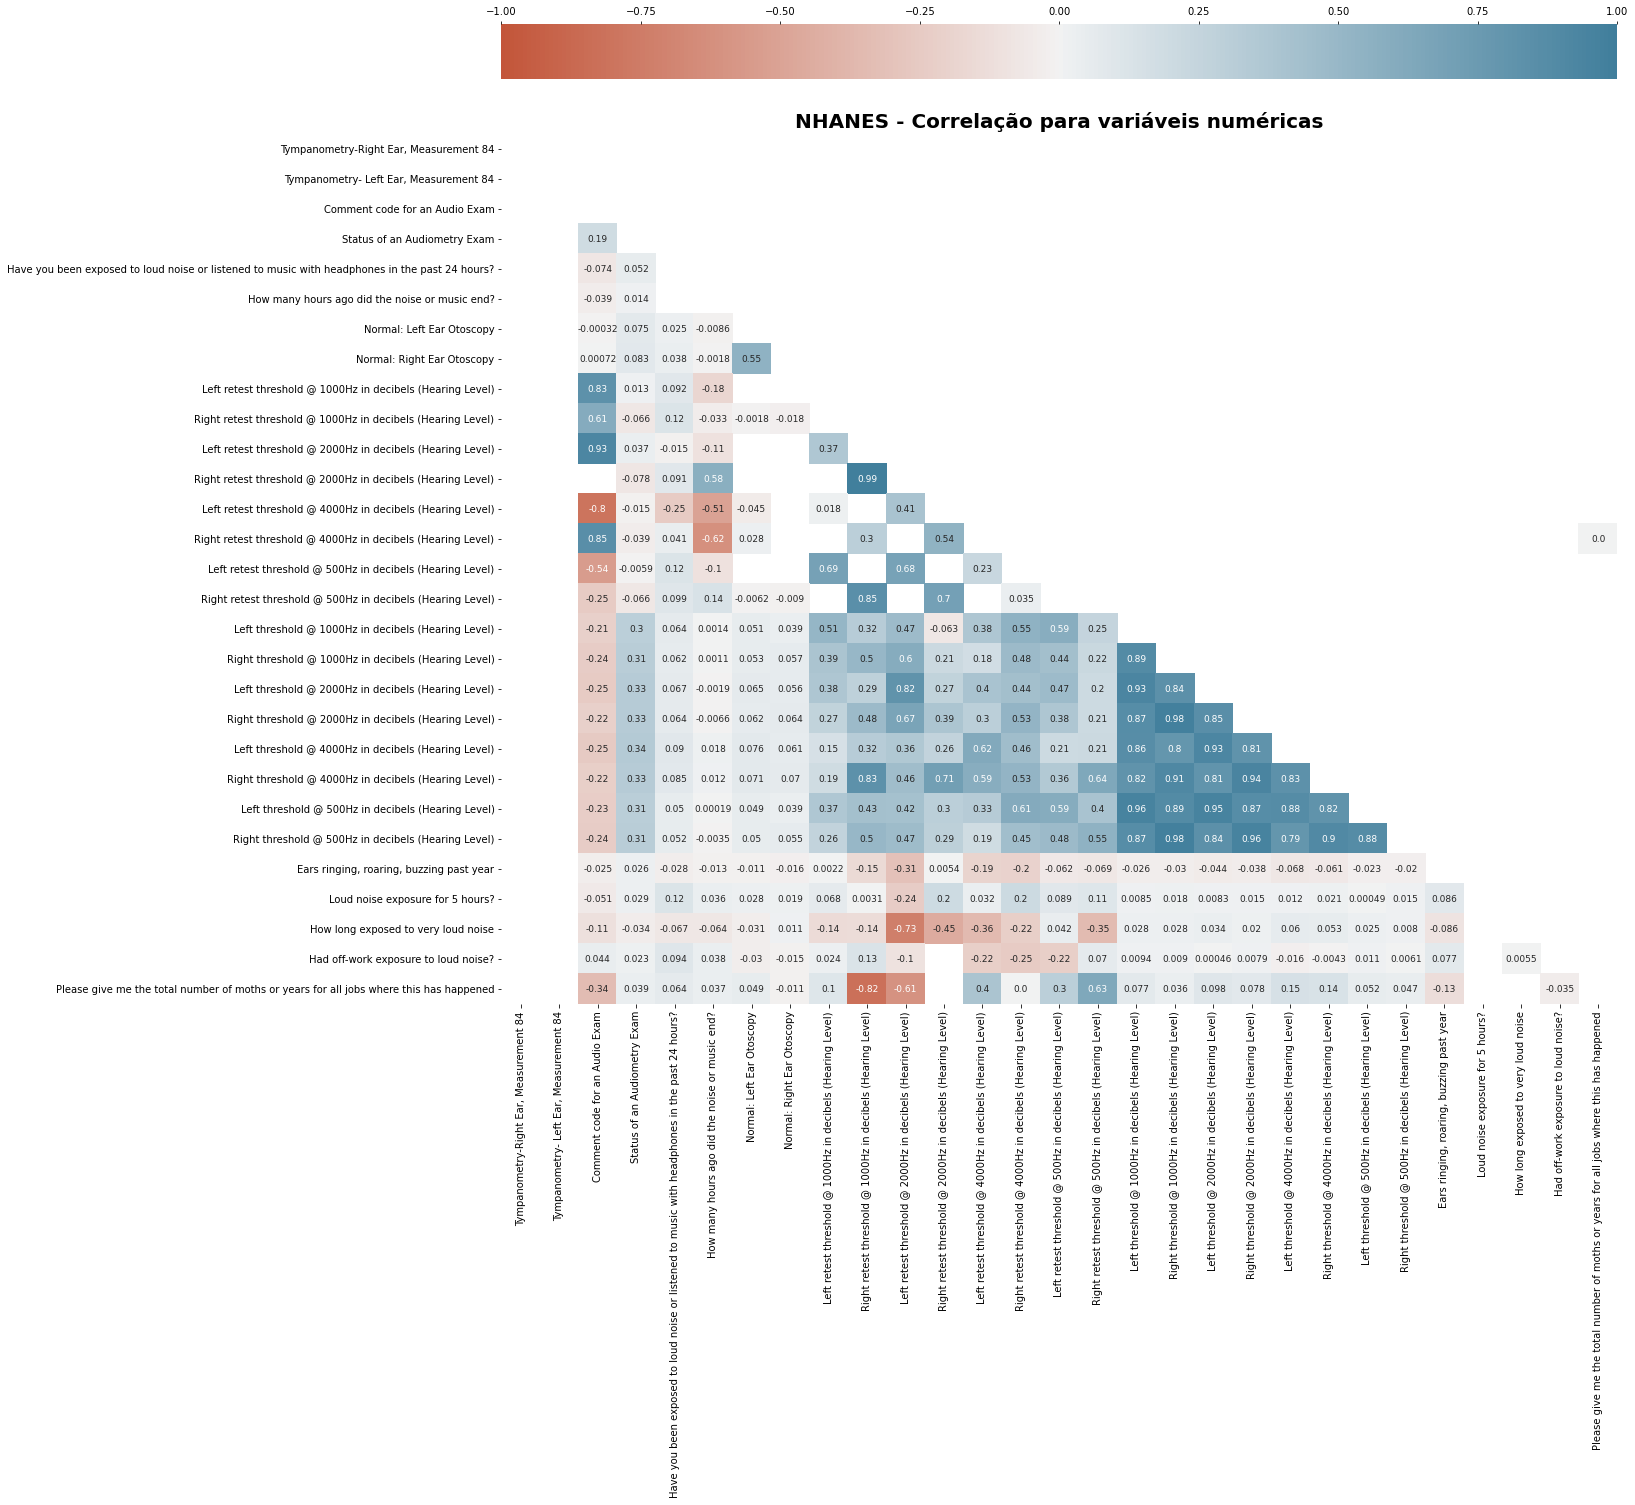

In [15]:
# source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
corr = df_filtered.drop(['SEQN', 'index'], 1).corr()

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)
divnorm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

heatmap_corr = sns.heatmap(corr,
                           mask=mask,
                           cmap=cmap,
                           norm=divnorm,
                           cbar_kws = dict(use_gridspec=False, location="top"),
                           annot=True,
                           fmt='.2',
                           annot_kws={"fontsize": 9})
heatmap_corr.set_title('NHANES - Correlação para variáveis numéricas', fontsize = 20, fontweight='bold');

In [16]:
heatmap_corr_fig = heatmap_corr.get_figure()
heatmap_corr_fig.savefig('../images/heatmap_corr.png')

## Are otoscopies within nominal values?
This information is  in `'Normal: Left Ear Otoscopy'` and `'Normal: Right Ear Otoscopy'`, where 1 is yes and 2 is no.

In [17]:
df_filtered[['years', 'Normal: Left Ear Otoscopy', 'Normal: Right Ear Otoscopy']].groupby('years').describe()

Normal: Left Ear Otoscopy                                          \
                              count      mean       std  min  25%  50%  75%   
years                                                                         
2005-2006                    2789.0  1.159197  0.365925  1.0  1.0  1.0  1.0   
2007-2008                    1149.0  1.126197  0.332216  1.0  1.0  1.0  1.0   
2009-2010                    2229.0  1.204127  0.403153  1.0  1.0  1.0  1.0   
2011-2012                    3908.0  1.137155  0.344054  1.0  1.0  1.0  1.0   
2015-2016                    4283.0  1.152230  0.359285  1.0  1.0  1.0  1.0   

               Normal: Right Ear Otoscopy                                     \
           max                      count      mean       std  min  25%  50%   
years                                                                          
2005-2006  2.0                     2789.0  1.175690  0.380625  1.0  1.0  1.0   
2007-2008  2.0                     1149.0  1.130548  0.337052  1.0  1.0  1.0   
2009-2010  2.0                     2229.0  1.224316  0.417225  1.0  1.0  1.0   
2011-2012  2.0                     3908.0  1.148414  0.355555  1.0  1.0  1.0   
2015-2016  2.0                     4283.0  1.168573  0.374418  1.0  1.0  1.0   

                     
           75%  max  
years                
2005-2006  1.0  2.0  
2007-2008  1.0  2.0  
2009-2010  1.0  2.0  
2011-2012  1.0  2.0  
2015-2016  1.0  2.0

In [18]:
df_left = df_filtered[df_filtered['Normal: Left Ear Otoscopy'] == 1]
df_left[['years', 'Normal: Left Ear Otoscopy']].groupby('years').count()

,Normal: Left Ear Otoscopy
years,
2005-2006,2345
2007-2008,1004
2009-2010,1774
2011-2012,3372
2015-2016,3631


### Same values in share of total

In [19]:
2345/2789

0.8408031552527788

In [20]:
1004/1149

0.8738033072236727

In [21]:
1774/2229

0.7958725886047555

In [22]:
3372/3908

0.8628454452405322

In [23]:
3631/4283

0.8477702544945132

In [24]:
df_right = df_filtered[df_filtered['Normal: Right Ear Otoscopy'] == 1]
df_right[['years', 'Normal: Right Ear Otoscopy']].groupby('years').count()

,Normal: Right Ear Otoscopy
years,
2005-2006,2299
2007-2008,999
2009-2010,1729
2011-2012,3328
2015-2016,3561


#### Same values in share of total

In [25]:
2299/2789

0.8243097884546432

In [26]:
999/1149

0.8694516971279374

In [27]:
1729/2229

0.7756841633019291

In [28]:
3328/3908

0.8515864892528148

In [29]:
3561/4283

0.831426570161102

## Hearing level average

### Left Ear - Quadritonal Mean

In [30]:
df_left['Left @ 500Hz in decibels (Hearing Level)'] = ''
df_left['Left @ 1000Hz in decibels (Hearing Level)'] = ''
df_left['Left @ 2000Hz in decibels (Hearing Level)'] = ''
df_left['Left @ 4000Hz in decibels (Hearing Level)'] = ''

for i in df_left.index:
    if df_left.loc[i, 'Left threshold @ 500Hz in decibels (Hearing Level)'] is None:
        df_left.loc[i, 'Left @ 500Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left retest threshold @ 500Hz in decibels (Hearing Level)']
    else:
        df_left.loc[i, 'Left @ 500Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left threshold @ 500Hz in decibels (Hearing Level)']
print(f"Done creating column Left @ 500Hz in decibels (Hearing Level)")

for i in df_left.index:
    if df_left.loc[i, 'Left threshold @ 1000Hz in decibels (Hearing Level)'] is None:
        df_left.loc[i, 'Left @ 1000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left retest threshold @ 1000Hz in decibels (Hearing Level)']
    else:
        df_left.loc[i, 'Left @ 1000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left threshold @ 1000Hz in decibels (Hearing Level)']
print(f"Done creating column Left @ 1000Hz in decibels (Hearing Level)")

for i in df_left.index:
    if df_left.loc[i, 'Left threshold @ 2000Hz in decibels (Hearing Level)'] is None:
        df_left.loc[i, 'Left @ 2000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left retest threshold @ 2000Hz in decibels (Hearing Level)']
    else:
        df_left.loc[i, 'Left @ 2000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left threshold @ 2000Hz in decibels (Hearing Level)']
print(f"Done creating column Left @ 2000Hz in decibels (Hearing Level)")

for i in df_left.index:
    if df_left.loc[i, 'Left threshold @ 4000Hz in decibels (Hearing Level)'] is None:
        df_left.loc[i, 'Left @ 4000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left retest threshold @ 4000Hz in decibels (Hearing Level)']
    else:
        df_left.loc[i, 'Left @ 4000Hz in decibels (Hearing Level)'] = df_left.loc[i, 'Left threshold @ 4000Hz in decibels (Hearing Level)']
print(f"Done creating column Left @ 4000Hz in decibels (Hearing Level)")

<ipython-input-30-42c813d4f33f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['Left @ 500Hz in decibels (Hearing Level)'] = ''
<ipython-input-30-42c813d4f33f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['Left @ 1000Hz in decibels (Hearing Level)'] = ''
<ipython-input-30-42c813d4f33f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Done creating column Left @ 500Hz in decibels (Hearing Level)
Done creating column Left @ 1000Hz in decibels (Hearing Level)
Done creating column Left @ 2000Hz in decibels (Hearing Level)
Done creating column Left @ 4000Hz in decibels (Hearing Level)


In [31]:
df_left['Left Ear - Quadritonal Mean Value'] = (
    (
     df_left['Left @ 500Hz in decibels (Hearing Level)'] + 
     df_left['Left @ 1000Hz in decibels (Hearing Level)'] + 
     df_left['Left @ 2000Hz in decibels (Hearing Level)'] +
     df_left['Left @ 4000Hz in decibels (Hearing Level)']
    ) / 4)

<ipython-input-31-4488fcd508b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['Left Ear - Quadritonal Mean Value'] = (


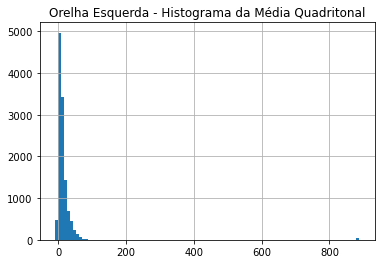

In [32]:
quad_left = df_left['Left Ear - Quadritonal Mean Value'].hist(bins = 100).set_title('Orelha Esquerda - Histograma da Média Quadritonal');
quad_left;

In [33]:
quad_left_fig = quad_left.get_figure()
quad_left_fig.savefig('../images/quad_left.png')

In [34]:
df_left['Left Ear - Quadritonal Mean Value'].median()

8.75

### Right Ear - Quadritonal Mean

In [35]:
df_right['Right @ 500Hz in decibels (Hearing Level)'] = ''
df_right['Right @ 1000Hz in decibels (Hearing Level)'] = ''
df_right['Right @ 2000Hz in decibels (Hearing Level)'] = ''
df_right['Right @ 4000Hz in decibels (Hearing Level)'] = ''

for i in df_right.index:
    if df_right.loc[i, 'Right threshold @ 500Hz in decibels (Hearing Level)'] is None:
        df_right.loc[i, 'Right @ 500Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right retest threshold @ 500Hz in decibels (Hearing Level)']
    else:
        df_right.loc[i, 'Right @ 500Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right threshold @ 500Hz in decibels (Hearing Level)']
print(f"Done creating column Right @ 500Hz in decibels (Hearing Level)")

for i in df_right.index:
    if df_right.loc[i, 'Right threshold @ 1000Hz in decibels (Hearing Level)'] is None:
        df_right.loc[i, 'Right @ 1000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right retest threshold @ 1000Hz in decibels (Hearing Level)']
    else:
        df_right.loc[i, 'Right @ 1000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right threshold @ 1000Hz in decibels (Hearing Level)']
print(f"Done creating column Right @ 1000Hz in decibels (Hearing Level)")

for i in df_right.index:
    if df_right.loc[i, 'Right threshold @ 2000Hz in decibels (Hearing Level)'] is None:
        df_right.loc[i, 'Right @ 2000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right retest threshold @ 2000Hz in decibels (Hearing Level)']
    else:
        df_right.loc[i, 'Right @ 2000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right threshold @ 2000Hz in decibels (Hearing Level)']
print(f"Done creating column Right @ 2000Hz in decibels (Hearing Level)")

for i in df_right.index:
    if df_right.loc[i, 'Right threshold @ 4000Hz in decibels (Hearing Level)'] is None:
        df_right.loc[i, 'Right @ 4000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right retest threshold @ 4000Hz in decibels (Hearing Level)']
    else:
        df_right.loc[i, 'Right @ 4000Hz in decibels (Hearing Level)'] = df_right.loc[i, 'Right threshold @ 4000Hz in decibels (Hearing Level)']
print(f"Done creating column Right @ 4000Hz in decibels (Hearing Level)")

<ipython-input-35-a0d5ead743ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_right['Right @ 500Hz in decibels (Hearing Level)'] = ''
<ipython-input-35-a0d5ead743ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_right['Right @ 1000Hz in decibels (Hearing Level)'] = ''
<ipython-input-35-a0d5ead743ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Done creating column Right @ 500Hz in decibels (Hearing Level)
Done creating column Right @ 1000Hz in decibels (Hearing Level)
Done creating column Right @ 2000Hz in decibels (Hearing Level)
Done creating column Right @ 4000Hz in decibels (Hearing Level)


In [36]:
df_right['Right Ear - Quadritonal Mean Value'] = (
    (
     df_right['Right @ 500Hz in decibels (Hearing Level)'] + 
     df_right['Right @ 1000Hz in decibels (Hearing Level)'] + 
     df_right['Right @ 2000Hz in decibels (Hearing Level)'] +
     df_right['Right @ 4000Hz in decibels (Hearing Level)']
    ) / 4)

<ipython-input-36-83ae8a0923bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_right['Right Ear - Quadritonal Mean Value'] = (


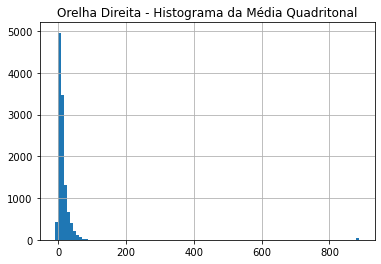

In [37]:
quad_right = df_right['Right Ear - Quadritonal Mean Value'].hist(bins = 100).set_title('Orelha Direita - Histograma da Média Quadritonal');
quad_right;

In [38]:
quad_right_fig = quad_right.get_figure()
quad_right_fig.savefig('../images/quad_right.png')

In [39]:
df_right['Right Ear - Quadritonal Mean Value'].median()

8.75

## Hearing Level Classification

### Right Ear

In [40]:
classification_order = ['Normal', 'Leve', 'Moderada', 'Moderadamente severa', 'Severa', 'Profunda', 'Perda auditiva completa']

In [41]:
def hearing_classification(df, ear):
    df[ear + ' - Hearing Loss Class'] = ''

    for i in df.index:
        if df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 20:
            df.loc[i, ear + 'Hearing Loss Class'] = 'Normal'
        elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 35:
            df.loc[i, ear + 'Hearing Loss Class'] = 'Leve'
        elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 50:
            df.loc[i, ear + 'Hearing Loss Class'] = 'Moderada'
        elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 65:
            df.loc[i, ear + 'Hearing Loss Class'] = 'Moderadamente severa'
        elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 80:
            df.loc[i, ear + 'Hearing Loss Class'] = 'Severa'
        elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] < 95:
            df.loc[i, ear + 'Hearing Loss Class'] = 'Profunda'
        elif df.loc[i, ear + ' Ear - Quadritonal Mean Value'] >= 95:
            df.loc[i, ear + 'Hearing Loss Class'] = 'Perda auditiva completa'
        else:
            pass
  
    return print('Done')

In [42]:
hearing_classification(df_right, 'Right')

<ipython-input-41-98b8caacc01c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ear + ' - Hearing Loss Class'] = ''
C:\Users\julia\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\julia\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Done


In [43]:
df_right.head()

,index,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,...,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",Please give me the total number of moths or years for all jobs where this has happened,Right @ 500Hz in decibels (Hearing Level),Right @ 1000Hz in decibels (Hearing Level),Right @ 2000Hz in decibels (Hearing Level),Right @ 4000Hz in decibels (Hearing Level),Right Ear - Quadritonal Mean Value,Right - Hearing Loss Class,RightHearing Loss Class
0,2,31129.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,...,NaN,NaN,NaN,10.0,15.0,5.0,5.0,8.75,,Normal
2,5,31132.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,...,NaN,NaN,NaN,20.0,15.0,20.0,100.0,38.75,,Moderada
3,6,31133.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,...,NaN,NaN,NaN,0.0,-5.0,-5.0,0.0,-2.5,,Normal
7,14,31141.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,0.0,-5.0,-5.0,5.0,-1.25,,Normal
8,16,31143.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,...,NaN,NaN,NaN,20.0,5.0,10.0,0.0,8.75,,Normal


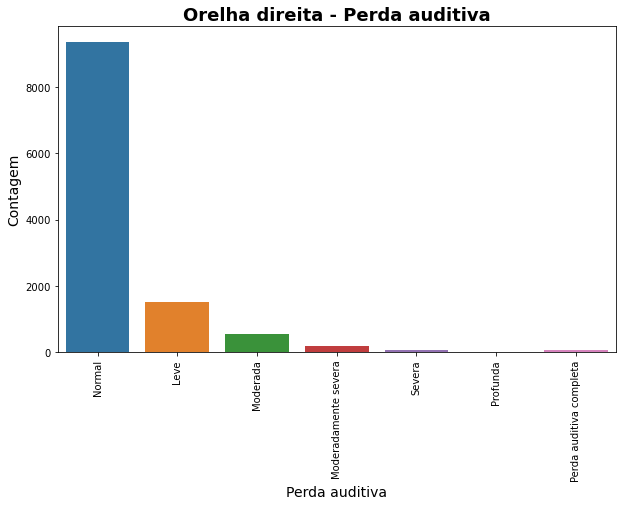

In [44]:
plt.subplots(figsize = (10,6))
ax = sns.countplot(x = 'RightHearing Loss Class',
              data = df_right,
              order = classification_order);
ax.set_title('Orelha direita - Perda auditiva',fontsize = 18, fontweight='bold');
ax.set_xlabel('Perda auditiva', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [45]:
class_right_fig = ax.get_figure()
class_right_fig.savefig('../images/class_right.png')

In [46]:
df_right['RightHearing Loss Class'].value_counts()

Normal                     9349
Leve                       1526
Moderada                    551
Moderadamente severa        208
Severa                       72
Perda auditiva completa      65
Profunda                     21
Name: RightHearing Loss Class, dtype: int64

In [47]:
df_right['RightHearing Loss Class'].count()

11792

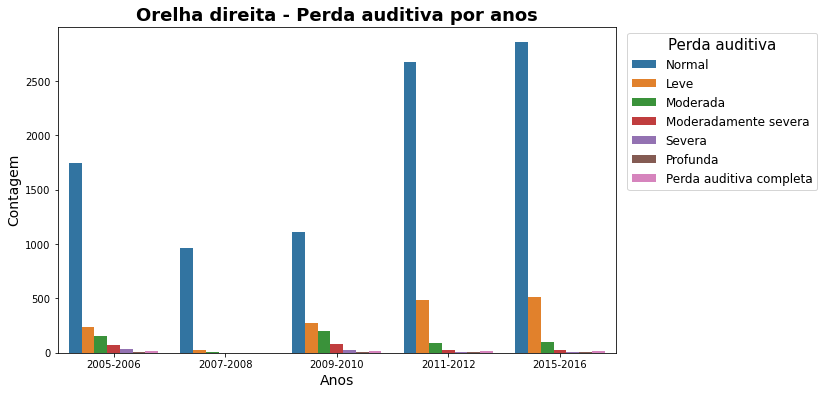

In [48]:
plt.subplots(figsize = (10,6))
right_year = sns.countplot(data = df_right,
                           x = 'years',
                           hue = 'RightHearing Loss Class',
                           hue_order = classification_order);
right_year.set_title('Orelha direita - Perda auditiva por anos',fontsize = 18, fontweight='bold');
right_year.set_xlabel('Anos', fontsize = 14)
right_year.set_ylabel('Contagem', fontsize = 14)
right_year.legend(fontsize = 12,
                  bbox_to_anchor= (1.01, 1),
                  title="Perda auditiva",
                  title_fontsize = 15);

In [49]:
right_year_fig = right_year.get_figure()
right_year_fig.savefig('../images/class_year_right.png')

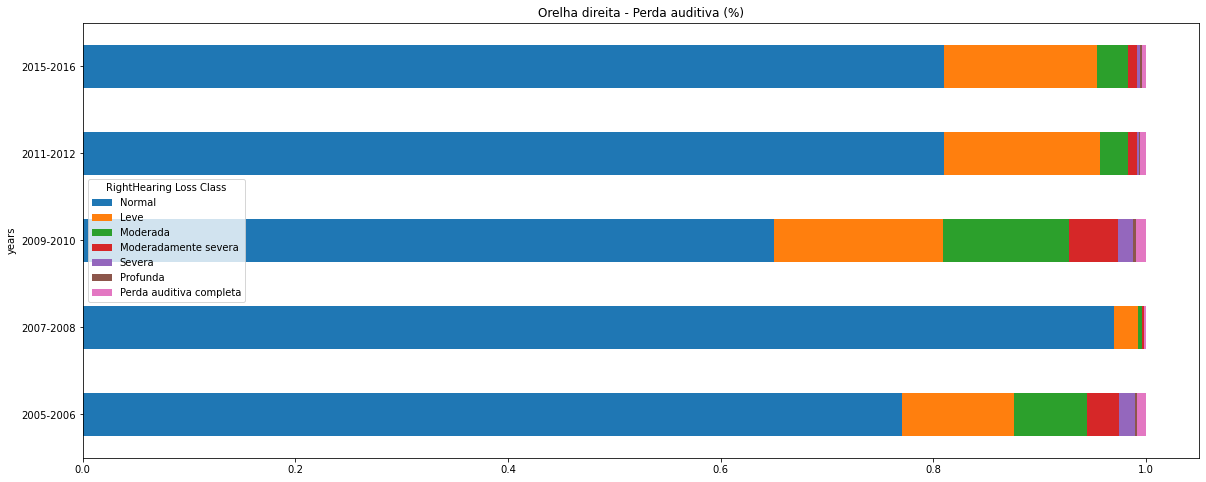

In [50]:
# Get count of each year by classification
df_right_by_class = df_right.groupby(['years', 'RightHearing Loss Class']).size().reset_index().pivot(columns='RightHearing Loss Class', index='years', values=0)
# Calculating percentage by year
df_right_by_class_percentage = df_right_by_class.div(df_right_by_class.sum(axis=1), axis=0)
# Reordering columns
df_right_by_class_percentage = df_right_by_class_percentage[classification_order]
right_year_cum = df_right_by_class_percentage.plot(kind='barh', stacked=True, figsize=(20,8)).set_title('Orelha direita - Perda auditiva (%)');

In [51]:
right_year_cum_fig = right_year_cum.get_figure()
right_year_cum_fig.savefig('../images/class_year_cum_right.png')

### Left Ear

In [52]:
hearing_classification(df_left, 'Left')

<ipython-input-41-98b8caacc01c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ear + ' - Hearing Loss Class'] = ''
C:\Users\julia\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\julia\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Done


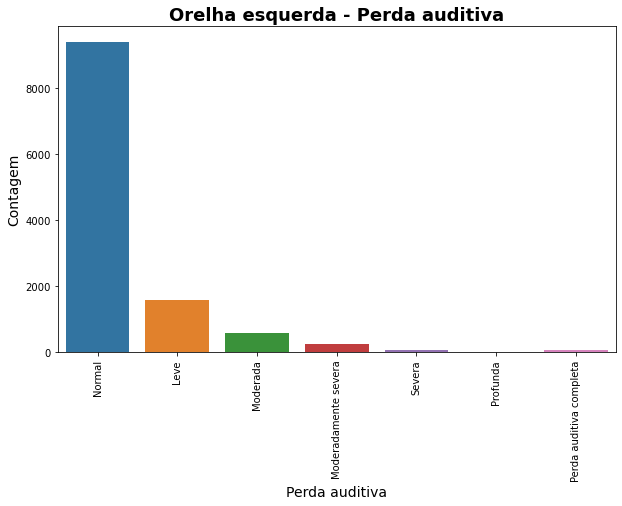

In [53]:
plt.subplots(figsize = (10,6))
ax_l = sns.countplot(x = 'LeftHearing Loss Class',
                     data = df_left,
                     order = classification_order);
ax_l.set_title('Orelha esquerda - Perda auditiva',fontsize = 18, fontweight='bold');
ax_l.set_xlabel('Perda auditiva', fontsize = 14)
ax_l.set_ylabel('Contagem', fontsize = 14)
ax_l.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [54]:
ax_l_fig = ax_l.get_figure()
ax_l_fig.savefig('../images/class_left.png')

In [55]:
df_left['LeftHearing Loss Class'].value_counts()

Normal                     9410
Leve                       1574
Moderada                    588
Moderadamente severa        249
Severa                       80
Perda auditiva completa      68
Profunda                     26
Name: LeftHearing Loss Class, dtype: int64

In [56]:
df_left['LeftHearing Loss Class'].count()

11995

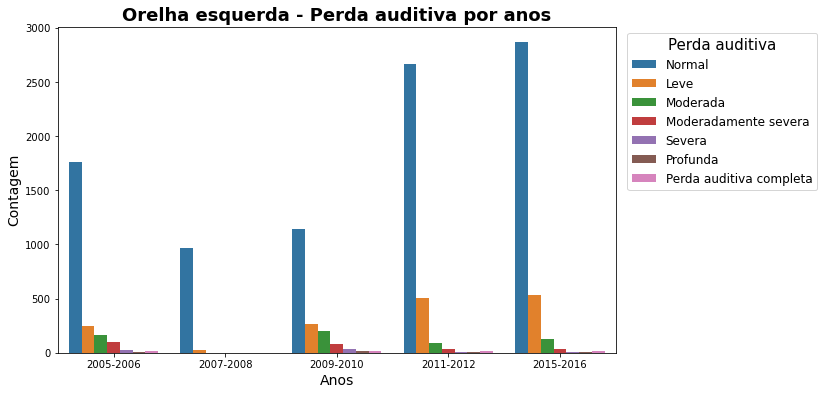

In [57]:
plt.subplots(figsize = (10,6))
left_year = sns.countplot(data = df_left,
              x = 'years',
              hue = 'LeftHearing Loss Class',
              hue_order = classification_order);
left_year.set_title('Orelha esquerda - Perda auditiva por anos', fontsize = 18, fontweight='bold');
left_year.set_xlabel('Anos', fontsize = 14)
left_year.set_ylabel('Contagem', fontsize = 14)
left_year.legend(fontsize = 12,
                 bbox_to_anchor= (1.01, 1),
                 title="Perda auditiva",
                 title_fontsize = 15);

In [58]:
left_year_fig = left_year.get_figure()
left_year_fig.savefig('../images/class_year_left.png')

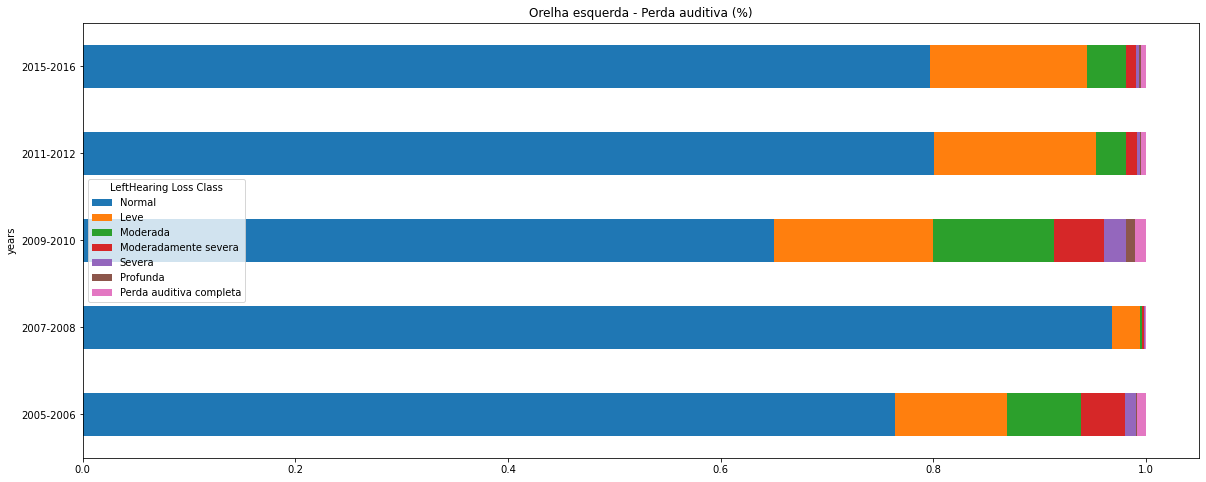

In [59]:
# Get count of each year by classification
df_left_by_class = df_left.groupby(['years', 'LeftHearing Loss Class']).size().reset_index().pivot(columns='LeftHearing Loss Class', index='years', values=0)
# Calculating percentage by year
df_left_by_class_percentage = df_left_by_class.div(df_left_by_class.sum(axis=1), axis=0)
# Reordering columns
df_left_by_class_percentage = df_left_by_class_percentage[classification_order]
left_year_cum = df_left_by_class_percentage.plot(kind='barh', stacked=True, figsize=(20,8)).set_title('Orelha esquerda - Perda auditiva (%)');

In [60]:
left_year_cum_fig = left_year_cum.get_figure()
left_year_cum_fig.savefig('../images/class_year_cum_left.png')

## Save data

In [61]:
df_right.to_csv('../data/processed/right_clean.csv')
df_left.to_csv('../data/processed/left_clean.csv')